[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MikeS96/cv_dl/blob/main/lab2/CVDL_Lab2.ipynb)

# **Laboratorio No. 2**

**Metodos de regularización aplicado clasificadores de imágenes.**

<font color='GREEN'>Integrantes:
Sebastian Botero   2205892,
Miguel Saavedra    2205805,
Gustavo Salazar    2205363

## Modelo basico
**Paso 1.**
<font color='green'>Cargando librerias básicas y el dataset cifar10.</font>


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as LK 
import tensorflow.keras.models as MK 
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test,y_test)= cifar10.load_data() 

170500096/170498071 [==============================] - 11s 0us/step


**Paso 2.** <font color='green'>Normalizacion y reshape</font>


In [ ]:

x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
x_train, x_test = (x_train-x_train.min())/(x_train.max()-x_train.min()), (x_test-x_test.min())/(x_test.max()-x_test.min()) #Normalizando


**Paso 3.** <font color='green'> Creación de la ConvNet</font>

Basados en la VGG de Simonyan y Zisserman. Entrene de nuevo y guarde los resultados de accuracy y loss.


**Cabe anotar que dado el caracter probabilistico del clasificador los resultados pueden variar razonablemente, cada vez que el modelo sea entrenado nuevamente**

In [ ]:
tf.keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

In [ ]:
# Modelo Basico
from keras.optimizers import SGD
inputs = LK.Input(shape=(32,32,3)) 
conv1 = LK.Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(inputs) 
conv2 = LK.Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(conv1) 
pool1 = LK.MaxPool2D((2,2),(2,2))(conv2)

conv3 = LK.Conv2D(64,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(pool1) 
conv4 = LK.Conv2D(64,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(conv3) 
pool2 = LK.MaxPool2D((2,2),(2,2))(conv4) 

conv5 = LK.Conv2D(128,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(pool2) 
conv6 = LK.Conv2D(128,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(conv5) 
pool3 = LK.MaxPool2D((2,2),(2,2))(conv6) 

flat =  LK.Flatten()(pool3) 
FC3 = LK.Dense(128,activation='relu', kernel_initializer='he_normal')(flat)
outputs = LK.Dense(10,activation='softmax')(FC3) 

modelo_basico = MK.Model(inputs,outputs) 
modelo_basico.summary()
optimo = SGD(lr=0.001, momentum=0.9)
modelo_basico.compile(optimizer=optimo, loss='sparse_categorical_crossentropy',metrics=['accuracy'] )

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0     

In [ ]:
history =modelo_basico.fit(x_train,y_train, epochs=50, batch_size=64,validation_data=(x_test, y_test), verbose=1)
loss,acc= modelo_basico.evaluate(x_test,y_test,verbose=1)
print("Loss:{0} - Accuracy:{1}".format(loss,acc) ) #Forma moderna de imprimir con formato en python


Epoch 1/50
782/782 [==============================] - 45s 20ms/step - loss: 1.9480 - accuracy: 0.2901 - val_loss: 1.5074 - val_accuracy: 0.4622
Epoch 2/50
782/782 [==============================] - 15s 19ms/step - loss: 1.4227 - accuracy: 0.4877 - val_loss: 1.2960 - val_accuracy: 0.5417
Epoch 3/50
782/782 [==============================] - 15s 19ms/step - loss: 1.2178 - accuracy: 0.5690 - val_loss: 1.1757 - val_accuracy: 0.5891
Epoch 4/50
782/782 [==============================] - 15s 19ms/step - loss: 1.1033 - accuracy: 0.6095 - val_loss: 1.0833 - val_accuracy: 0.6152
Epoch 5/50
782/782 [==============================] - 15s 19ms/step - loss: 0.9873 - accuracy: 0.6510 - val_loss: 1.0078 - val_accuracy: 0.6468
Epoch 6/50
782/782 [==============================] - 15s 19ms/step - loss: 0.8945 - accuracy: 0.6866 - val_loss: 1.0193 - val_accuracy: 0.6481
Epoch 7/50
782/782 [==============================] - 15s 19ms/step - loss: 0.8348 - accuracy: 0.7065 - val_loss: 0.8879 - val_accuracy:

**Visualización**
Graficaremos el ***accuracy*** tanto para los datos de ***train*** como para los datos de ***test***.

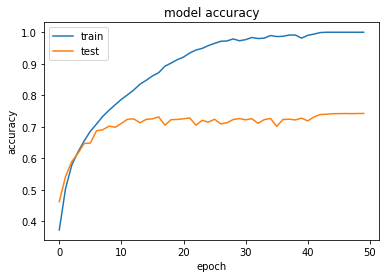

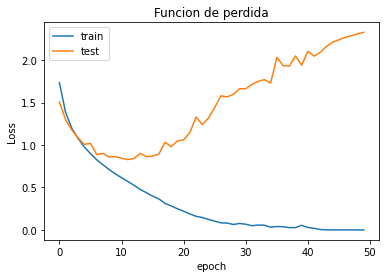

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Funcion de perdida')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
modelo_basico.save('modelo_basico.h5')

## </font><font color='blue'> **Ejercicio 1.**</font>

**Partiendo del modelo base evalue y salve 3 modelos nuevos agregandole a cada uno de ellos uno de los métodos de regularización vistos en clase:**

Modelo base + dropout

Modelo base + regularization

Modelo base + data augmentation 

Escriba una conclusión en lenguaje técnico apropiado acerca de los resultados obtenidos

</font><font color='red'>Notas:</font>

a) Preste mucha atención a que cada modelo tenga nombre diferente. 

b) Para el caso del data augmentation el modo de evaluación cambia, observe bien como este deberá ser evaluado. Se supone que  Modelo base + data augmentation da un accuracy semejante al que se obtiene con el Modelo base + dropout. Observe como se usa <font color='red'>*keras.utils.to_categorical*</font> ¿Que es y para que sirve esta utilidad? ¿Porque solo fue necesario para el caso de data augmentation?

**Respuesta b:** El método *keras.utils.to_categorical* se encarga de hacer un one-hot encoding a las clases asignadas al dataset de interés. Es decir, para este caso del CIFAR-10 se tienen 10 clases o targets, donde cada una está enumerada de **0** a **9**. El one-hot encoding consiste en volver cada valor numérico a un vector fila con un uno en la posición del label y cero en todas las demás. Un ejemplo de esto puede ser visto en el siguiente ejemplo.



```
labels = [0, 1, 2, 3]
one_hot = [[1, 0, 0, 0],
           [0, 1, 0, 0],
           [0, 0, 1, 0],
           [0, 0, 0, 1]]
```

Lo anterior ejemplifica el one-hot encoding o la función [keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical), donde el primer target *0* se convierte en el vector `[1, 0, 0, 0]`, el target 1 en `[0, 1, 0, 0]` y así sucesivamente. Cabe resaltar que solo existe un uno en la posición del label.

El one-hot encoding es utilizado generalmente en la capa de salida de una red neuronal, asignando un uno únicamente a la neurona ganadora. Este tipo de encoding facilita el entrenamiento en redes neuronales y permite la aplicación de funciones de activación tipo softmax y funciones de perdida de entropía cruzada para problemas de clasificación.

Para el caso de **data augmentation** es necesario transformar los labels a su representación de one-hot encoding ya que el método de [ImageDataGenerator](https://keras.io/api/preprocessing/image/) de Keras funciona únicamente con este tipo de encoding y no tipo *int*, el cual es el que viene por defecto con el dataset de CIFAR-10. De igual manera, esta es la razón por la cual la función de perdida para Data Augmentation es `categorical_crossentropy`, la cual recibe el target como one-hot encoding y no `sparse_categorical_crossentropy` la cual recibe el target como un *int*.







### 1.Modelo base + dropout

In [ ]:
tf.keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

In [ ]:
# Modelo Basico + dropout
from keras.optimizers import SGD
inputs = LK.Input(shape=(32,32,3)) 
conv1 = LK.Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(inputs) 
conv2 = LK.Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(conv1) 
pool1 = LK.MaxPool2D((2,2),(2,2))(conv2)
drop1 = LK.Dropout(0.25)(pool1)

conv3 = LK.Conv2D(64,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(drop1) 
conv4 = LK.Conv2D(64,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(conv3) 
pool2 = LK.MaxPool2D((2,2),(2,2))(conv4) 
drop2 = LK.Dropout(0.25)(pool2)

conv5 = LK.Conv2D(128,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(drop2) 
conv6 = LK.Conv2D(128,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(conv5) 
pool3 = LK.MaxPool2D((2,2),(2,2))(conv6)
drop3 = LK.Dropout(0.25)(pool3) 

flat =  LK.Flatten()(drop3) 
FC3 = LK.Dense(128,activation='relu', kernel_initializer='he_normal')(flat)
drop4 = LK.Dropout(0.25)(FC3)
outputs = LK.Dense(10,activation='softmax')(drop4) 

mb_dropout = MK.Model(inputs,outputs) 
mb_dropout.summary()
optimo = SGD(lr=0.001, momentum=0.9)
mb_dropout.compile(optimizer=optimo, loss='sparse_categorical_crossentropy',metrics=['accuracy'] )

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        3692

In [ ]:
history =mb_dropout.fit(x_train,y_train, epochs=50, batch_size=64,validation_data=(x_test, y_test), verbose=1)
loss_drop,acc_drop= mb_dropout.evaluate(x_test,y_test,verbose=1)
print("Loss:{0} - Accuracy:{1}".format(loss_drop,acc_drop) ) #Forma moderna de imprimir con formato en python

Epoch 1/50
782/782 [==============================] - 7s 8ms/step - loss: 2.2926 - accuracy: 0.1637 - val_loss: 1.8499 - val_accuracy: 0.3313
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 1.8058 - accuracy: 0.3316 - val_loss: 1.6103 - val_accuracy: 0.4096
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 1.6628 - accuracy: 0.3811 - val_loss: 1.5261 - val_accuracy: 0.4382
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 1.5698 - accuracy: 0.4202 - val_loss: 1.4290 - val_accuracy: 0.4669
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 1.4785 - accuracy: 0.4543 - val_loss: 1.3274 - val_accuracy: 0.5222
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 1.4234 - accuracy: 0.4797 - val_loss: 1.2842 - val_accuracy: 0.5396
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 1.3420 - accuracy: 0.5120 - val_loss: 1.2237 - val_accuracy: 0.5566
Epoch 

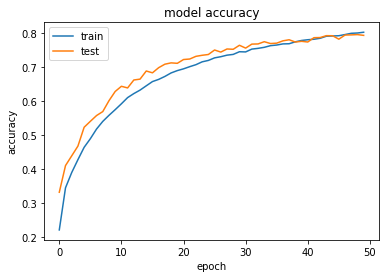

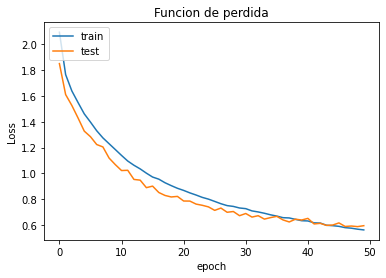

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Funcion de perdida')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
mb_dropout.save('mb_dropout.h5')

### 1.Modelo base + regularization

In [ ]:
tf.keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

In [ ]:
# Modelo Basico + regularizacion L2
from keras.optimizers import SGD
from keras.regularizers import l2

inputs = LK.Input(shape=(32,32,3)) 
conv1 = LK.Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal',kernel_regularizer=l2(0.01), activation='relu')(inputs) 
conv2 = LK.Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal',kernel_regularizer=l2(0.01), activation='relu')(conv1) 
pool1 = LK.MaxPool2D((2,2),(2,2))(conv2)

conv3 = LK.Conv2D(64,(3,3),padding='same', kernel_initializer='he_normal',kernel_regularizer=l2(0.01), activation='relu')(pool1) 
conv4 = LK.Conv2D(64,(3,3),padding='same', kernel_initializer='he_normal',kernel_regularizer=l2(0.01), activation='relu')(conv3) 
pool2 = LK.MaxPool2D((2,2),(2,2))(conv4) 

conv5 = LK.Conv2D(128,(3,3),padding='same', kernel_initializer='he_normal',kernel_regularizer=l2(0.01), activation='relu')(pool2) 
conv6 = LK.Conv2D(128,(3,3),padding='same', kernel_initializer='he_normal',kernel_regularizer=l2(0.01), activation='relu')(conv5) 
pool3 = LK.MaxPool2D((2,2),(2,2))(conv6)

flat =  LK.Flatten()(pool3) 
FC3 = LK.Dense(128,activation='relu', kernel_initializer='he_normal',kernel_regularizer=l2(0.01),)(flat)
outputs = LK.Dense(10,activation='softmax')(FC3) 

mb_reg = MK.Model(inputs,outputs) 
mb_reg.summary()
optimo = SGD(lr=0.001, momentum=0.9)
mb_reg.compile(optimizer=optimo, loss='sparse_categorical_crossentropy',metrics=['accuracy'] )

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 8, 8, 64)          0  

In [ ]:
history =mb_reg.fit(x_train,y_train, epochs=50, batch_size=64,validation_data=(x_test, y_test), verbose=1)
loss_reg,acc_reg= mb_reg.evaluate(x_test,y_test,verbose=1)
print("Loss:{0} - Accuracy:{1}".format(loss_reg,acc_reg) ) #Forma moderna de imprimir con formato en python

Epoch 1/50
782/782 [==============================] - 7s 8ms/step - loss: 3.0889 - accuracy: 0.2878 - val_loss: 2.6198 - val_accuracy: 0.4589
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 2.5485 - accuracy: 0.4798 - val_loss: 2.4000 - val_accuracy: 0.5269
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 2.3413 - accuracy: 0.5510 - val_loss: 2.2476 - val_accuracy: 0.5852
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 2.1643 - accuracy: 0.6090 - val_loss: 2.1277 - val_accuracy: 0.6166
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 2.0307 - accuracy: 0.6489 - val_loss: 2.0247 - val_accuracy: 0.6447
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 1.9150 - accuracy: 0.6841 - val_loss: 2.0136 - val_accuracy: 0.6494
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 1.8220 - accuracy: 0.7088 - val_loss: 1.9077 - val_accuracy: 0.6777
Epoch 

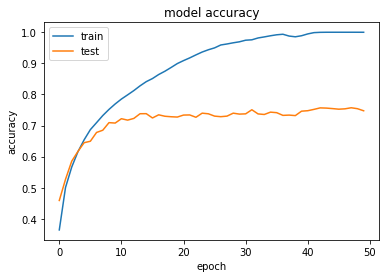

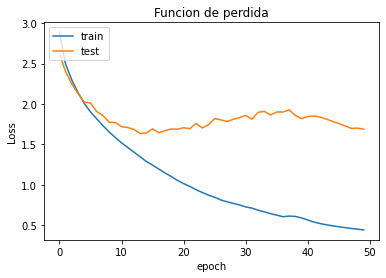

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Funcion de perdida')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
mb_reg.save('mb_reg.h5')

### 1.Modelo base + data augmentation

In [ ]:
tf.keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

In [ ]:
# Modelo base + data augmentation
from keras.optimizers import SGD
inputs = LK.Input(shape=(32,32,3)) 
conv1 = LK.Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(inputs) 
conv2 = LK.Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(conv1) 
pool1 = LK.MaxPool2D((2,2),(2,2))(conv2)

conv3 = LK.Conv2D(64,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(pool1) 
conv4 = LK.Conv2D(64,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(conv3) 
pool2 = LK.MaxPool2D((2,2),(2,2))(conv4) 

conv5 = LK.Conv2D(128,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(pool2) 
conv6 = LK.Conv2D(128,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(conv5) 
pool3 = LK.MaxPool2D((2,2),(2,2))(conv6)

flat =  LK.Flatten()(pool3) 
FC3 = LK.Dense(128,activation='relu', kernel_initializer='he_normal')(flat)
outputs = LK.Dense(10,activation='softmax')(FC3) 

mb_data_aug = MK.Model(inputs,outputs) 
mb_data_aug.summary()
optimo = SGD(lr=0.001, momentum=0.9)
mb_data_aug.compile(optimizer=optimo, loss='categorical_crossentropy',metrics=['accuracy'] )

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 8, 8, 64)          0  

In [ ]:
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
y_train_cat = np_utils.to_categorical(y_train, 10)
y_test_cat = np_utils.to_categorical(y_test, 10)
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1)
test_datagen = ImageDataGenerator()
datagen.fit(x_train)
iterator = datagen.flow(x_train, y_train_cat, batch_size=64)
iterator_test = datagen.flow(x_test, y_test_cat, batch_size=64)
muestras = x_train.shape[0] // 64 

# fits the model on batches with real-time data augmentation:
history = mb_data_aug.fit(iterator, steps_per_epoch = muestras, epochs=50, verbose = 1, validation_data = iterator_test)
loss_aug,acc_aug= mb_data_aug.evaluate(x_test, y_test_cat, verbose=1)
print("Loss:{0} - Accuracy:{1}".format(loss_aug,acc_aug) ) 

Epoch 1/50
781/781 [==============================] - 29s 36ms/step - loss: 2.0314 - accuracy: 0.2726 - val_loss: 1.5715 - val_accuracy: 0.4311
Epoch 2/50
781/781 [==============================] - 28s 36ms/step - loss: 1.5546 - accuracy: 0.4415 - val_loss: 1.4802 - val_accuracy: 0.4725
Epoch 3/50
781/781 [==============================] - 28s 36ms/step - loss: 1.4207 - accuracy: 0.4919 - val_loss: 1.3382 - val_accuracy: 0.5216
Epoch 4/50
781/781 [==============================] - 28s 36ms/step - loss: 1.3252 - accuracy: 0.5302 - val_loss: 1.2371 - val_accuracy: 0.5561
Epoch 5/50
781/781 [==============================] - 28s 36ms/step - loss: 1.2333 - accuracy: 0.5602 - val_loss: 1.2253 - val_accuracy: 0.5629
Epoch 6/50
781/781 [==============================] - 28s 36ms/step - loss: 1.1706 - accuracy: 0.5856 - val_loss: 1.1320 - val_accuracy: 0.5997
Epoch 7/50
781/781 [==============================] - 28s 36ms/step - loss: 1.1203 - accuracy: 0.6060 - val_loss: 1.0925 - val_accuracy:

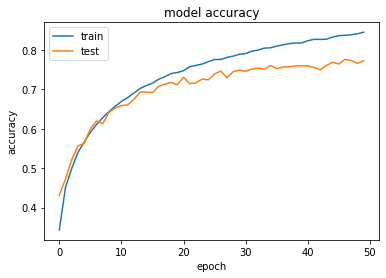

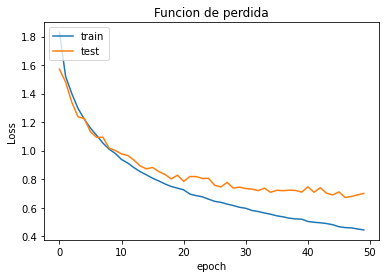

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Funcion de perdida')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
mb_data_aug.save('mb_data_aug.h5')

### 1.Conclusion
El proposito de la regularizacion es que el modelo pueda generalizar mejor la informacion que le ingresa, es decir reducir el overfitting o lograr que el modelo no aprenda exclusivamente las caracteristicas de los datos de entrenamiento como sucede con el modelo base. 

Teniendo esto en cuenta, al analizar las tecnicas anteriormente utilizadas, vemos que el dropout permite escoger aleatoriamente neuronas para inhabilitarlas temporalmente, así, obligamos de manera a aleatoria a las neuronas a entrenarse con la informacion que la red recibe. Esto finalmente conlleva a que **todas** las neuronas de la red puedan percivir de manera correcta las caracteristicas de los objetos y asi generalizar mejor. Esto permitió que el modelo de dropout no obtuviera un accuracy de 1 durante training pero si mejorará drásticamente el accuracy de testing, llevandonos a concluir que el modelo generaliza mucho mejor con dropout.

La técnica de regularización L2 pretende mantener los pesos sinápticos cercanos a cero para así evitar que ciertos pesos de la red tengan mayor importancia que otros. Lo anterior permite que estos no crezcan de manera desproporcionada y así se mantenga regularizada la red. Las diferentes pruebas realizadas con L2 muestran que el modelo generaliza mejor al compararlo con el modelo base, sin embargo, dropout generó mejores resultados.

De igual forma, el Data augmentation obtuvo buenos resultados de generalización debido a que como se estan generando mas imagenes con diferentes operaciones sobre la misma (rotación, escalado, traslación), se le esta permitiendo a la red encontrar mas caracteristicas en las nuevas imagenes utilizadas, ayudando en el entrenamiento cuando existen problemas con la simplicidad de los datos. Este modelo permitió mejorar el accuracy de testing y posicionarse en segundo lugar entre las 3 técnicas nombrasdas de regularización, no obstante, la técnica de regularización con dropout arrojó los mejores resultados.

## </font><font color='blue'> **Ejercicio 2.**</font>

**Prueba adicional con el dropout**

Dado que algunos autores sostienen que el dropout no deberia usarse sobre las capas convolucionales y dejarlo exclusivamente para las "fully connected layers" , realice un entrenamiento eliminando los dropouts que usted haya incluido en las capas convolucionales. Compare los resultados de Loss y Accuracy, entre estas dos redes. ¿Que puede concluir al respecto?

In [ ]:
tf.keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

In [ ]:
# Modelo Basico + dropout dense
from keras.optimizers import SGD
inputs = LK.Input(shape=(32,32,3)) 
conv1 = LK.Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(inputs) 
conv2 = LK.Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(conv1) 
pool1 = LK.MaxPool2D((2,2),(2,2))(conv2)


conv3 = LK.Conv2D(64,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(pool1) 
conv4 = LK.Conv2D(64,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(conv3) 
pool2 = LK.MaxPool2D((2,2),(2,2))(conv4) 


conv5 = LK.Conv2D(128,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(pool2) 
conv6 = LK.Conv2D(128,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(conv5) 
pool3 = LK.MaxPool2D((2,2),(2,2))(conv6)


flat =  LK.Flatten()(pool3) 
FC3 = LK.Dense(128,activation='relu', kernel_initializer='he_normal')(flat)
drop4 = LK.Dropout(0.25)(FC3)
outputs = LK.Dense(10,activation='softmax')(drop4) 

mb_dropout2 = MK.Model(inputs,outputs) 
mb_dropout2.summary()
optimo = SGD(lr=0.001, momentum=0.9)
mb_dropout2.compile(optimizer=optimo, loss='sparse_categorical_crossentropy',metrics=['accuracy'] )

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 8, 8, 64)          0  

In [ ]:
history =mb_dropout2.fit(x_train,y_train, epochs=50, batch_size=64,validation_data=(x_test, y_test), verbose=1)
loss_drop2,acc_drop2= mb_dropout2.evaluate(x_test,y_test,verbose=1)


Epoch 1/50
782/782 [==============================] - 7s 8ms/step - loss: 1.9893 - accuracy: 0.2718 - val_loss: 1.4859 - val_accuracy: 0.4667
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 1.5155 - accuracy: 0.4518 - val_loss: 1.3331 - val_accuracy: 0.5171
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 1.3498 - accuracy: 0.5184 - val_loss: 1.2548 - val_accuracy: 0.5450
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 1.2219 - accuracy: 0.5631 - val_loss: 1.1303 - val_accuracy: 0.6045
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 1.1290 - accuracy: 0.6029 - val_loss: 1.0282 - val_accuracy: 0.6330
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 1.0358 - accuracy: 0.6336 - val_loss: 1.0009 - val_accuracy: 0.6514
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 0.9649 - accuracy: 0.6608 - val_loss: 0.9260 - val_accuracy: 0.6710
Epoch 

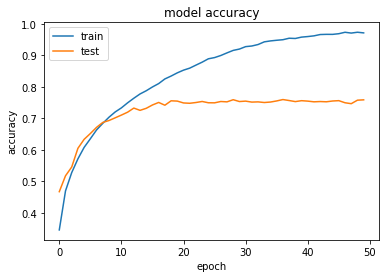

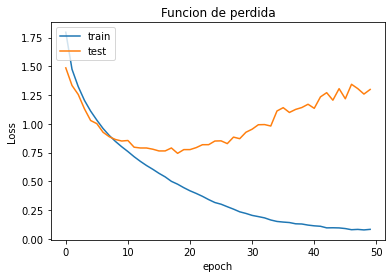

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Funcion de perdida')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("Score with test:")
print("Dropout conv - Loss:{0} - Accuracy:{1}".format(loss_drop,acc_drop) ) #Forma moderna de imprimir con formato en python
print("Dropout dense - Loss:{0} - Accuracy:{1}".format(loss_drop2,acc_drop2) ) #Forma moderna de imprimir con formato en python

Score with test:
Dropout conv - Loss:0.5823704600334167 - Accuracy:0.8001000285148621
Dropout dense - Loss:1.298279881477356 - Accuracy:0.758400022983551


### 2.Conclusion
Al comparar el accuracy de ambos modelos, se puede observar que el que utiliza Dropout en las capas Convolucionales obtiene mejor resultado que el modelo que solo utiliza el Dropout en las Fully Connected, esto se debe a que el segundo esta regularizando unicamente sobre la Dense, lo que no es suficiente, al ser una capa de tan limitadas neuronas muy pocas son inhabilitadas al tiempo, y las capas Conv de este mismo modelo se van a sobre entrenar. Es por esto que para los modelos tipo CNN que tiene la mayoría de parámetros en las capas convolucionales, es mejor utilizar dropout en las capas dense y las capas convolucionales para evitar problemas de sobre entrenamiento.

## </font><font color='blue'> **Ejercicio 3.**</font>

**Realice y salve 1 nuevo modelo diferente mezclando 2 diferentes alternativas de regularización**

Escriba una conclusión en lenguaje técnico apropiado acerca de los resultados obtenidos

</font><font color='red'>Notas:</font>

a) Usted puede incluir otras alterantivas de regularización, tales como: batch normalization o early stopping. Si usa nuevas técnicas de regularización dedique un parrafo a explicar el funcionamiento de estas.

b) Cambios al modelo  base también son aceptables. Si los realiza, justifiquelos usando lenguaje técnico apropiado.



Para este caso utilizaremos la técnica de **batch normalization** para aumentar el inference accuracy del modelo. 

Esta ténica consiste en transformar las entradas a capas de tal forma de que éstas queden estandarizadas, es decir, tendrán una media de cero y una desviación estándar de uno. Lo anterior permitirá mejorar los tiempos de entrenamiento y cuenta también con un efecto positivo en términos de regularización ya que los valores de entrada a cada capa son estandarizados. Este método está implementado en Keras y se puede ver la documentación [aquí](https://keras.io/api/layers/normalization_layers/batch_normalizati) 

La capa de batch normalziation se agrega justo después de capas convolucionales o capas fully connected.

In [ ]:
tf.keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

In [ ]:
# Modelo Basico + regularizacion L2
from keras.optimizers import SGD, Adam
from keras.regularizers import l2

inputs = LK.Input(shape=(32,32,3)) 
conv1 = LK.Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(inputs) 
batch1 = LK.BatchNormalization()(conv1)
conv2 = LK.Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(batch1) 
batch2 = LK.BatchNormalization()(conv2)
pool1 = LK.MaxPool2D((2,2),(2,2))(batch2)
drop1 = LK.Dropout(0.25)(pool1)

conv3 = LK.Conv2D(64,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(drop1) 
batch3 = LK.BatchNormalization()(conv3)
conv4 = LK.Conv2D(64,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(batch3)
batch4 = LK.BatchNormalization()(conv4) 
pool2 = LK.MaxPool2D((2,2),(2,2))(batch4) 
drop2 = LK.Dropout(0.25)(pool2)

conv5 = LK.Conv2D(128,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(drop2) 
batch5 = LK.BatchNormalization()(conv5)
conv6 = LK.Conv2D(128,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(batch5) 
batch6 = LK.BatchNormalization()(conv6)
pool3 = LK.MaxPool2D((2,2),(2,2))(batch6)
drop3 = LK.Dropout(0.25)(pool3)

flat =  LK.Flatten()(drop3) 
FC3 = LK.Dense(128,activation='relu', kernel_initializer='he_normal')(flat)
batch7 = LK.BatchNormalization()(FC3) 
drop4 = LK.Dropout(0.25)(batch7)
outputs = LK.Dense(10,activation='softmax')(drop4) 

mb_comb = MK.Model(inputs,outputs) 
mb_comb.summary()
#optimo = SGD(lr=0.001, momentum=0.9)
optimo = Adam(lr=0.001)
mb_comb.compile(optimizer=optimo, loss='categorical_crossentropy',metrics=['accuracy'] )

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_52 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_53 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 16, 16, 32)        0   

In [ ]:
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

y_train_cat = np_utils.to_categorical(y_train, 10)
y_test_cat = np_utils.to_categorical(y_test, 10)
datagen = ImageDataGenerator(rotation_range = 10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True)
test_datagen = ImageDataGenerator()
datagen.fit(x_train)
iterator = datagen.flow(x_train, y_train_cat, batch_size=64)
iterator_test = datagen.flow(x_test, y_test_cat, batch_size=64)
muestras = x_train.shape[0] // 64 

history =mb_comb.fit(iterator, steps_per_epoch = muestras, epochs=50, verbose = 1, validation_data = iterator_test)
loss_comb,acc_comb= mb_comb.evaluate(x_test,y_test_cat,verbose=1)
print("Loss:{0} - Accuracy:{1}".format(loss_comb,acc_comb) ) #Forma moderna de imprimir con formato en python

Epoch 1/50
781/781 [==============================] - 32s 39ms/step - loss: 1.8652 - accuracy: 0.3610 - val_loss: 1.2175 - val_accuracy: 0.5655
Epoch 2/50
781/781 [==============================] - 31s 40ms/step - loss: 1.2152 - accuracy: 0.5636 - val_loss: 1.0005 - val_accuracy: 0.6437
Epoch 3/50
781/781 [==============================] - 30s 39ms/step - loss: 1.0046 - accuracy: 0.6446 - val_loss: 0.8367 - val_accuracy: 0.7045
Epoch 4/50
781/781 [==============================] - 30s 39ms/step - loss: 0.8727 - accuracy: 0.6968 - val_loss: 0.7539 - val_accuracy: 0.7323
Epoch 5/50
781/781 [==============================] - 30s 39ms/step - loss: 0.7904 - accuracy: 0.7239 - val_loss: 0.7302 - val_accuracy: 0.7443
Epoch 6/50
781/781 [==============================] - 30s 39ms/step - loss: 0.7390 - accuracy: 0.7412 - val_loss: 0.7142 - val_accuracy: 0.7557
Epoch 7/50
781/781 [==============================] - 30s 39ms/step - loss: 0.6992 - accuracy: 0.7582 - val_loss: 0.7042 - val_accuracy:

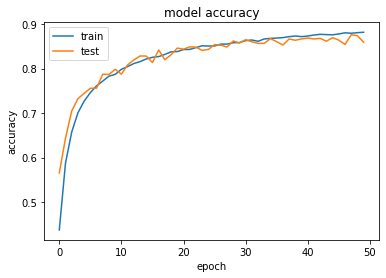

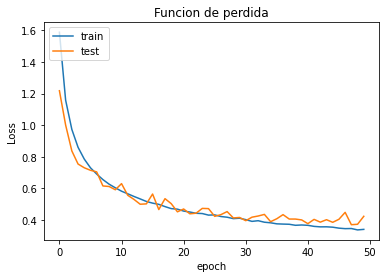

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Funcion de perdida')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
mb_comb.save('mb_comb.h5')

### 3.Conclusion
En esta prueba se juntaron 3 metodos de regularizacion: Data Augmentation, Dropout y Batch normalization, los cuales cada uno aporta desde una perspectiva diferente al mejor rendimiento del modelo.

La prueba demuestra que no fue necesario volver más complejo el modelo para obtener un mejor resultado que en las anteriores pruebas. Se logró evitar que el modelo se sobre entrenara pasandole multiples imagenes gracias al Data Augmentation, tambien al usar el dropout se consiguió inhabilitar parte de las neuronas en todas las capas y obetener una mejor generalizacion. Por ultimo, con el batch normalization fue posible estandarizar los pesos de la red para así, garantizar una buena generalización por parte del modelo y evitar el sobre entrenamiento que el modelo base tiene.

Estos resultados fueron hallados después de varios experimentos utilizando las mejores técnicas de regularización halladas anteriormente e indagando de batch normalization para mejorar el entrenamiento. Adicionalmente, se cambio el optimizador SGD por ADAM.

## </font><font color='blue'> **Ejercicio 4.**</font>

**Usando un dataset de imagenes de prueba**

Para el conjunto de 12 imagenes nuevas dadas, escriba una función que le permita reducirlas al tamaño de entrada que exige el modelo (32x32x3).

</font><font color='red'>Nota:</font>

No olvide tener en cuenta el aspect ratio.


In [ ]:
import os
import cv2
import numpy as np

def load_img(dir_path,filesnames, size):
  #filesnames = os.listdir(dir_path)
  sw ,sh = size
  images=[]
  for file in filesnames:
    img = cv2.imread(os.path.join(dir_path, file))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    
    aspect_ratio = w/h  
    
    #para conservar el aspect ratio se calcula un pad dependiendo la proporcion
    if aspect_ratio > 1: 
    # quiere decir que la imagen es alargada horizontalmente y necesita pad arriba y abajo
      new_w = sw
      new_h = np.round(sw/aspect_ratio).astype(int)
      pad_vert = (sh-new_h)/2
      pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
      pad_left, pad_right = 0, 0
    elif aspect_ratio < 1: 
    # quiere decir que la imagen es alargada verticalmente y necesita pad a izquierda y derecha
      new_h=sh
      new_w = np.round(sh*aspect_ratio).astype(int)
      pad_horz = (sw-new_w)/2
      pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
      pad_top, pad_bot = 0, 0
    else: # si la imagen es cuadrada
      new_h, new_w = sh, sw
      pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    resized_img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
    
    resized_img = resized_img.astype('float32')
    resized_img = (resized_img-resized_img.min())/(resized_img.max()-resized_img.min()) #Normalizando
    resized_img = cv2.copyMakeBorder(resized_img, pad_top, pad_bot, pad_left, pad_right, cv2.BORDER_REFLECT) # BORDER_REPLICATE
    
    images.append(resized_img) 
  
  return images  

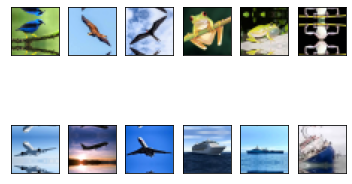

In [ ]:
import matplotlib.pyplot as plt
import cv2
# direccion o nombre de la carpeta con imagenes de prediccion
dir= 'dataset_prediccion'
# se cargan las imagenes en orden para poder calcular el accuracy
filesnames = ['bird1.jpg',
              'bird2.jpg',
              'bird3.jpg',
              'frog1.jpg',
              'frog2.jpg',
              'frog3.jpg',
              'plane1.jpg',
              'plane2.jpg',
              'plane3.jpg',
              'ship1.jpg',
              'ship2.jpg',
              'ship3.jpg']


images = load_img(dir,filesnames,(32,32))
for i in range(12):
    plt.subplot(2,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
plt.show()


## </font><font color='blue'> **Ejercicio 5.**</font>

**Predicciones sobre imagenes de prueba**

Utilice su mejor modelo para hacer predicciones sobre el dataset dado en el punto 4.

</font><font color='red'>Nota:</font>

Los integrantes del grupo que obtengan el mejor resultado tendrán un +1 punto ya sea sobre el examen parcial 1 o sobre el Laboratorio 1.


**Salvando y haciendo predicciones sobre nuevas imagenes**
El siguiente código, les puede servir para resolver los ejercicios 3 y 4. Sin embargo usted es libre de realizar su propio código.

In [ ]:
#Cargando un modelo
from keras.models import load_model
modelown = load_model('mb_comb.h5')

() --> True label


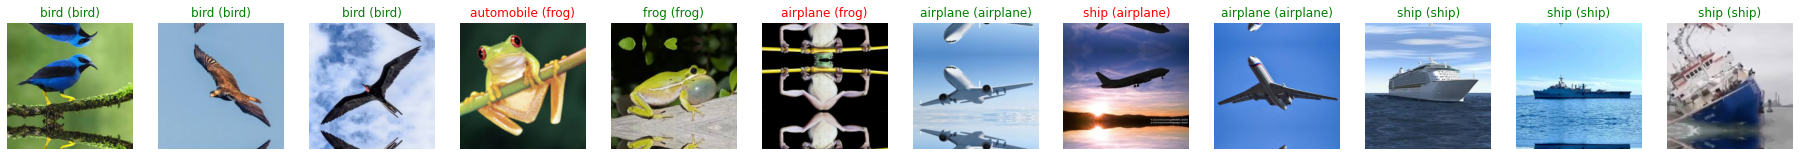

The accuracy with the new images is: 0.75
The number of new images well classified are:  9


In [ ]:

dir= 'dataset_prediccion'
images = load_img(dir,filesnames,(32,32))
b_img = load_img(dir,filesnames,(200,200))

etiquetas = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
true_labels = ['bird', 'bird', 'bird', 'frog', 'frog', 'frog',  'airplane', 'airplane','airplane', 'ship','ship', 'ship',]

pred_labels = []
_, axes = plt.subplots(nrows=1, ncols=12, figsize=(32, 32))
print('() --> True label')
for ax, image, label, i in zip(axes, images, true_labels,range(len(images))):
  img = images[i].reshape(-1,32,32,3) #Cargue las imagenes y realiceles el pre-procesamiento necesario.
  resultado = modelown.predict(img)
  pred_labels.append(str(etiquetas[resultado.argmax()]))
  ax.set_axis_off()
  ax.imshow(cv2.cvtColor(b_img[i], cv2.COLOR_BGR2RGB))
  ax.set_title("{} ({})".format(str(etiquetas[resultado.argmax()]), label),
                 color=("green" if str(etiquetas[resultado.argmax()])==label else "red"))
plt.show()
true_pred = sum(1 for x,y in zip(pred_labels, true_labels) if x == y) 
print('The accuracy with the new images is: {}'.format(true_pred/ float(len(true_labels))))
print('The number of new images well classified are: ',true_pred)

Utilizando el mejor modelo entrenado, se logro obtener un 75% en accuracy con las nuevas imagenes.

Se pudo determinar que el tipo de padding usado afectaba la presicion de este, se probaron varios metodos, pero el mejor resultado se obtuvo con ```BORDER_REFLECT```. 

Lo anterior nos lleva a concluir que utilizando las técnicas de regularización, datos y modelo adecuados, se pueden resolver diferentes problemas de clasificación con resultados prometedores aún usando técnicas de un poco más de una decada.
